# **Detección de eventos adversos a partir de representación FastText**

* Juan Sebastián Gómez Duque

El modelo FastText considera cada palabra como una bolsa de n-gramas de caracteres. Esto también se denomina modelo de subpalabras en el documento.

Se agregan símbolos de límites especiales al principio y al final de las palabras. Esto permite distinguir prefijos y sufijos de otras secuencias de caracteres. También incluiyen la propia palabra w en el conjunto de sus n-gramas, para aprender una representación de cada palabra (además de su carácter n-gramas).

#Fasttext

In [ ]:
!pip install git+https://github.com/facebookresearch/fastText.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/fastText.git to /tmp/pip-req-build-yxdzesfc
  Running command git clone -q https://github.com/facebookresearch/fastText.git /tmp/pip-req-build-yxdzesfc
  Using cached pybind11-2.9.2-py2.py3-none-any.whl (213 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3136683 sha256=4fb68b1385762dc7663f9f4cef7d68fe5743276cad351d8267d1bdea149a081b
  Stored in directory: /tmp/pip-ephem-wheel-cache-ey998a4n/wheels/bb/43/e5/e3f3787134132302730456e90905537c8026f23fcb8c9cd722
Successfully built fasttext


In [ ]:
import fasttext as ft

## **Se usa word representation**

## Modelo no supervisado

**Jugando con parametros**

In [ ]:
model = ft.train_unsupervised("/content/drive/MyDrive/Analisis de lenguaje natural/Proyecto/historias.txt", minCount=5, minn=2, maxn=6, dim=300,lr=0.5)

In [ ]:
model.save_model("/content/drive/MyDrive/Analisis de lenguaje natural/Proyecto/modelo_fasttext.bin")

In [ ]:
model.get_word_vector("soy").shape

(300,)

palabras vecinas más próximas

In [ ]:
model.get_nearest_neighbors('TUMOR',k=20)

[(0.5024721622467041, 'RADICAL'),
 (0.4464629292488098, 'conciencia'),
 (0.4336085915565491, 'CISTOPROSTATECTOMÍA'),
 (0.4328281283378601, 'CARDIACA'),
 (0.4040423631668091, '+'),
 (0.40177440643310547, 'estado'),
 (0.40012598037719727, 'REDUCCION'),
 (0.3895578682422638, 'INSUFICIENCIA'),
 (0.3884314000606537, 'medico'),
 (0.37694597244262695, 'CLIPAJE'),
 (0.3757752776145935, 'UCI'),
 (0.3715783357620239, 'SEPTICO'),
 (0.3702017664909363, 'UROCULTIVO'),
 (0.36694133281707764, '3845'),
 (0.36488670110702515, 'AGUDA'),
 (0.36184608936309814, '-INSUFICIENCIA'),
 (0.3577038049697876, 'Espontanea'),
 (0.3531319200992584, 'DESMIELINIZANTE'),
 (0.3504951298236847, 'HERNIA'),
 (0.35044142603874207, 'II/IV')]

## **Se reduce la dimensión de los vectores generados para cada palabra**

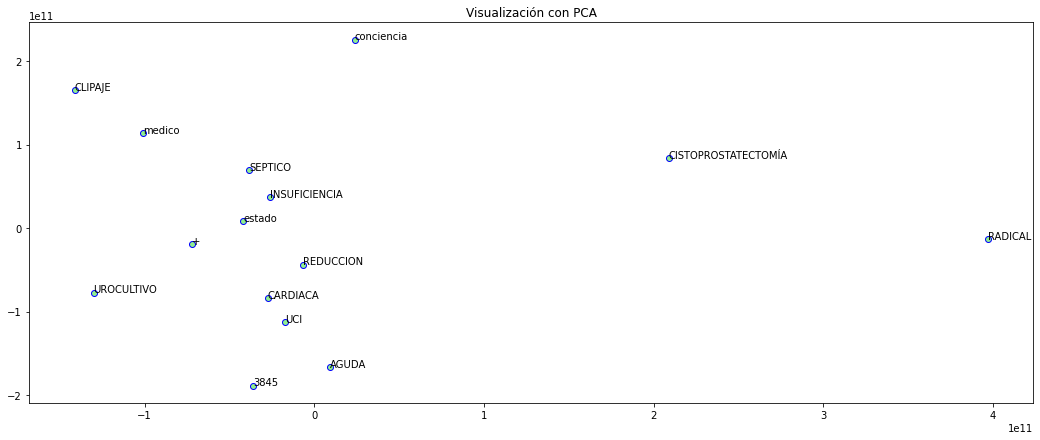

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

p = model.get_nearest_neighbors('TUMOR',k=15)
similar_words = [x[1] for x in p]
wvs = np.array([model.get_word_vector(sw) for sw in similar_words])

pca = PCA(n_components=2)
P = pca.fit_transform(wvs)
labels = similar_words

plt.figure(figsize=(18, 7))
plt.scatter(P[:, 0], P[:, 1], c='lightgreen', edgecolors='b')
plt.title('Visualización con PCA')

eps = 0.5e12*np.finfo(float).eps
for label, x, y in zip(labels, P[:, 0], P[:, 1]):
    plt.annotate(label, xy=(x+eps, y+eps), xytext=(0, 0), textcoords='offset points')

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


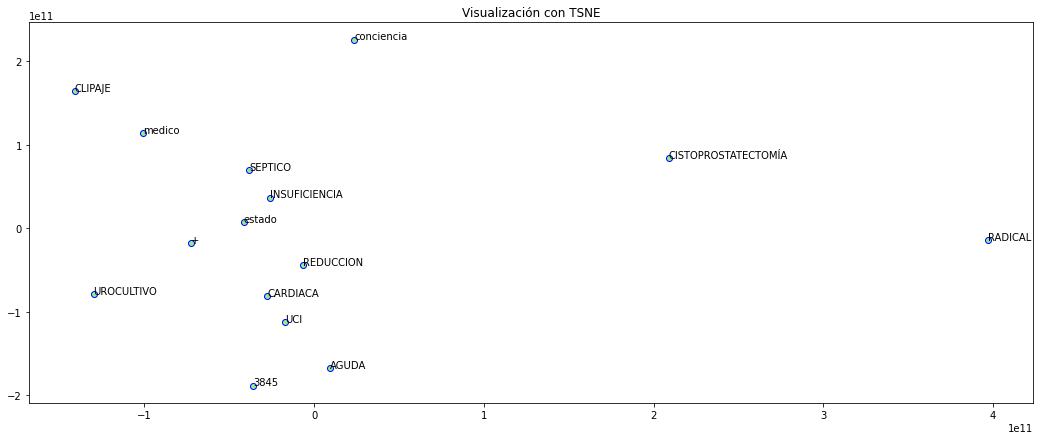

In [ ]:
#%matplotlib tk
#%matplotlib inline
# visualize embeddings
from sklearn.manifold import TSNE

p = model.get_nearest_neighbors('TUMOR',k=15)
similar_words = [x[1] for x in p]
wvs = np.array([model.get_word_vector(sw) for sw in similar_words])

tsne = TSNE(n_components=2, random_state=200, n_iter=5000, perplexity=2,learning_rate='auto',init='pca')
P = tsne.fit_transform(wvs)
labels = similar_words

plt.figure(figsize=(18, 7))
plt.scatter(P[:, 0], P[:, 1], c='lightgreen', edgecolors='b')
plt.title('Visualización con TSNE')

eps = 1e16*np.finfo(float).eps
for label, x, y in zip(labels, P[:, 0], P[:, 1]):
    plt.annotate(label, xy=(x+eps, y+eps), xytext=(0, 0), textcoords='offset points')
#fig.savefig('/content/drive/MyDrive/Analisis de lenguaje natural/Proyecto/line plot.jpg', bbox_inches='tight', dpi=150)

In [ ]:
coordenadas_pca=[]

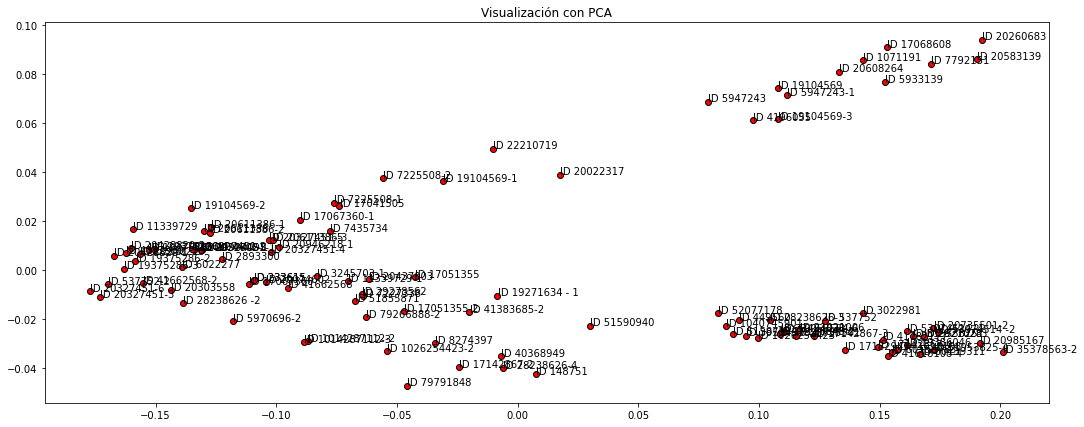

In [ ]:
textos = list(historias_2.iloc[:,0].apply(lambda x:x.replace("\n"," ")))

wvs = np.array([model.get_sentence_vector(t) for t in textos])

pca = PCA(n_components=2)
P = pca.fit_transform(wvs)
labels = historias_2.iloc[:,0].apply(lambda x:x.replace("\n"," ")).apply(lambda x:x.split(",")[0].split("con ")[-1])
plt.figure(figsize=(18, 7))
plt.scatter(P[:, 0], P[:, 1], c='red', edgecolors='k')
plt.title('Visualización con PCA')

eps = 1e11*np.finfo(float).eps
for label, x, y in zip(labels, P[:, 0], P[:, 1]):
    plt.annotate(label, xy=(x+eps, y+eps), xytext=(0, 0), textcoords='offset points')
    coordenadas_pca.append([label,x+eps,y+eps])

In [ ]:
coordenadas_tsne=[]

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


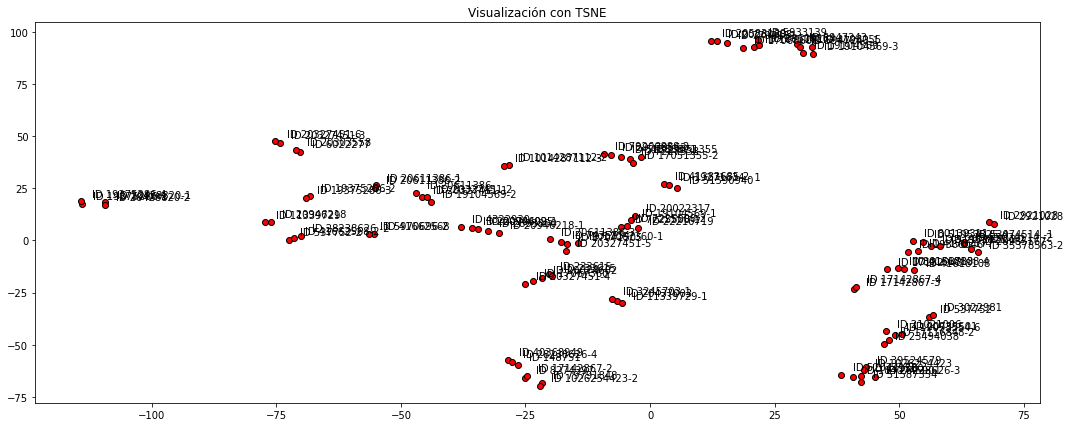

In [ ]:
textos = list(historias_2.iloc[:,0].apply(lambda x:x.replace("\n"," ")))

wvs = np.array([model.get_sentence_vector(t) for t in textos])

tsne = TSNE(n_components=2, random_state=200, n_iter=5000, perplexity=2,learning_rate='auto',init='pca')
P = tsne.fit_transform(wvs)
labels = historias_2.iloc[:,0].apply(lambda x:x.replace("\n"," ")).apply(lambda x:x.split(",")[0].split("con ")[-1])

fig=plt.figure(figsize=(18, 7))
plt.scatter(P[:, 0], P[:, 1], c='r', edgecolors='k')
plt.title('Visualización con TSNE')

eps = 1e16*np.finfo(float).eps
for label, x, y in zip(labels, P[:, 0], P[:, 1]):
    plt.annotate(label, xy=(x+eps, y+eps), xytext=(0, 0), textcoords='offset points')
    coordenadas_tsne.append([label,x+eps,y+eps])
fig.savefig('/content/drive/MyDrive/Analisis de lenguaje natural/Proyecto/line plot_2.jpg', bbox_inches='tight', dpi=150)

## **Se generan clusters para agrupar los eventos adversos**

**kmeans**

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(pd.DataFrame(coordenadas_pca).iloc[:,[1,2]])

In [ ]:
kmeans.labels_

array([0, 0, 0, 3, 3, 3, 0, 3, 3, 2, 0, 0, 2, 0, 3, 2, 3, 0, 3, 3, 2, 3,
       0, 0, 0, 0, 2, 2, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 3, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 0, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 0, 1, 0, 1, 2,
       1, 1, 1, 2, 1, 0, 1, 1, 2, 2, 1, 2, 1, 1, 1, 0, 2, 2, 2, 2],
      dtype=int32)

In [ ]:
coordenadas_cluster=pd.concat([pd.DataFrame(coordenadas_pca).iloc[:,[1,2]].rename(columns={1:"x",2:"y"}),pd.DataFrame(kmeans.labels_).rename(columns={0:'Cluster'})],axis=1)

In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt

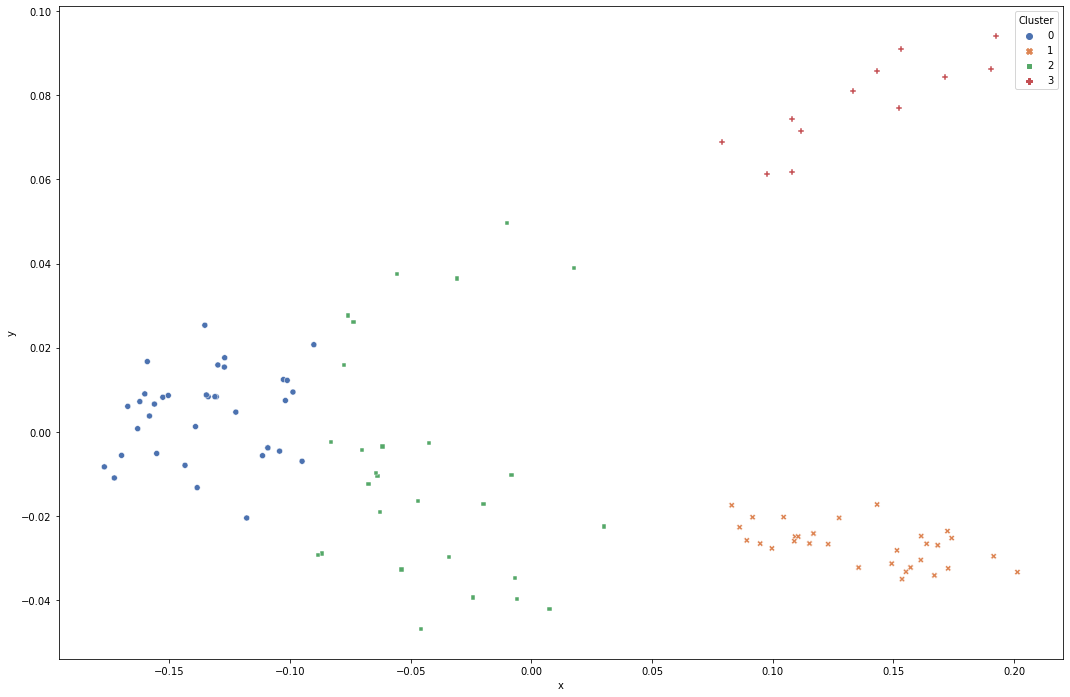

In [ ]:
f,axes = plt.subplots(figsize=(18,12))
sns.scatterplot(data=coordenadas_cluster, x="x", y="y",hue="Cluster",style="Cluster",palette="deep")
plt.show()

In [ ]:
labels_imp=[]

In [ ]:
for i in model.get_labels():
  labels_imp.append(model.get_sentence_vector(i))

In [ ]:
labels_pca=pca.transform(labels_imp)

In [ ]:
labels_coordinates=pd.DataFrame(labels_pca).rename(columns={0:'x',1:'y'})

In [ ]:
labels_coordinates=pd.concat([labels_coordinates,pd.DataFrame(model.get_labels()).rename(columns={0:'label'})],axis=1)

In [ ]:
labels_coordinates=pd.concat([labels_coordinates,pd.DataFrame(kmeans.predict(pd.DataFrame(labels_pca))).rename(columns={0:'Cluster'})],axis=1)

In [ ]:
centros=pd.DataFrame(kmeans.cluster_centers_).rename(columns={0:"x-centro",1:"y-centro"})
centros["Cluster"]=[0,1,2,3]
centros

,x-centro,y-centro,Cluster
0,-0.134467,0.004071,0
1,0.137745,-0.026826,1
2,-0.043068,-0.007959,2
3,0.136771,0.078091,3


In [ ]:
labels_coordinates=labels_coordinates.merge(centros,on="Cluster",how="left")


In [ ]:
labels_coordinates["distancia"]=np.sqrt((labels_coordinates["x-centro"]-labels_coordinates["x"])**2+(labels_coordinates["y-centro"]-labels_coordinates["y"])**2)

In [ ]:
labels_coordinates=labels_coordinates.sort_values(by=["Cluster","distancia"],ascending=[True,True])

In [ ]:
with open('/content/drive/MyDrive/Analisis de lenguaje natural/Proyecto/spanish.txt') as f:
    lines = f.read().splitlines()

In [ ]:
labels_coordinates=labels_coordinates.loc[~(labels_coordinates["label"].apply(lambda x:x.lower()).isin(lines))]

## **Se observan las principales etiquetas de cada Cluster**

**Cluster 0**

In [ ]:
labels_coordinates.loc[labels_coordinates["Cluster"]==0].head(15)

,x,y,label,Cluster,x-centro,y-centro,distancia
942,-0.133572,0.007778,IAM,0,-0.134467,0.004071,0.003813
862,-0.131038,0.001899,"VASOACTIVO,",0,-0.134467,0.004071,0.004060
1440,-0.133196,0.008895,NEUMOPATIA,0,-0.134467,0.004071,0.004988
1699,-0.135354,0.010834,ENUENTRO,0,-0.134467,0.004071,0.006820
1180,-0.125682,-0.001305,MECÁNICA,0,-0.134467,0.004071,0.010299
1141,-0.145019,0.001932,NUTRICIONAL,0,-0.134467,0.004071,0.010766
1746,-0.139373,-0.006486,"DUAL,",0,-0.134467,0.004071,0.011642
1919,-0.136677,0.016266,SALAS,0,-0.134467,0.004071,0.012393
2033,-0.121916,-0.003852,MESES,0,-0.134467,0.004071,0.014843
1622,-0.139505,0.018691,VARIOS,0,-0.134467,0.004071,0.015463


**Cluster 1**

In [ ]:
labels_coordinates.loc[labels_coordinates["Cluster"]==1].iloc[1:].head(15)

,x,y,label,Cluster,x-centro,y-centro,distancia
961,0.136455,-0.019079,ACETIL,1,0.137745,-0.026826,0.007853
826,0.144471,-0.033799,"RANITIDINA,",1,0.137745,-0.026826,0.009688
2065,0.138801,-0.014510,137,1,0.137745,-0.026826,0.012361
1817,0.143830,-0.038203,"13-09-2019,",1,0.137745,-0.026826,0.012902
2084,0.128500,-0.036059,FRNACY,1,0.137745,-0.026826,0.013067
2069,0.127934,-0.036248,96,1,0.137745,-0.026826,0.013603
1390,0.138023,-0.012528,140,1,0.137745,-0.026826,0.014300
1388,0.122003,-0.028773,16,1,0.137745,-0.026826,0.015863
214,0.152285,-0.036561,mecánica,1,0.137745,-0.026826,0.017498
304,0.122465,-0.036795,personas,1,0.137745,-0.026826,0.018245


**Cluster 2**

In [ ]:
labels_coordinates.loc[labels_coordinates["Cluster"]==2].head(15)

,x,y,label,Cluster,x-centro,y-centro,distancia
1946,-0.037152,-0.005665,GRAVEDAD,2,-0.043068,-0.007959,0.006345
1807,-0.044566,0.000678,INMEDIATAMENTE,2,-0.043068,-0.007959,0.008766
1406,-0.051360,0.001837,"DESMOPRESINA,",2,-0.043068,-0.007959,0.012834
1139,-0.031045,-0.001018,AMPICILINA,2,-0.043068,-0.007959,0.013883
1800,-0.059385,-0.009093,NEUROINFECCION,2,-0.043068,-0.007959,0.016356
1023,-0.055664,0.003308,I,2,-0.043068,-0.007959,0.016899
908,-0.059019,-0.000173,MIDAZOLAM,2,-0.043068,-0.007959,0.017749
406,-0.060380,-0.019687,PROPOFOL,2,-0.043068,-0.007959,0.020911
1353,-0.030604,0.009884,"GAITAN,",2,-0.043068,-0.007959,0.021765
1465,-0.021336,-0.019627,"NOCHE,",2,-0.043068,-0.007959,0.024667


**Cluster 3**

In [ ]:
labels_coordinates.loc[labels_coordinates["Cluster"]==3].head(15)

,x,y,label,Cluster,x-centro,y-centro,distancia
393,0.135530,0.067201,CLORO,3,0.136771,0.078091,0.010960
1990,0.145369,0.057614,"NIMODIPINO,",3,0.136771,0.078091,0.022208
1382,0.158871,0.080513,"VASOPRESINA,",3,0.136771,0.078091,0.022232
1032,0.118417,0.092023,92,3,0.136771,0.078091,0.023043
324,0.111108,0.078849,"NORADRENALINA,",3,0.136771,0.078091,0.025674
1239,0.110768,0.065237,",ENOXAPARINA",3,0.136771,0.078091,0.029006
2014,0.120870,0.053340,2.1,3,0.136771,0.078091,0.029419
104,0.156518,0.100960,"central,",3,0.136771,0.078091,0.030214
922,0.148335,0.048690,CL,3,0.136771,0.078091,0.031593
100,0.107764,0.065056,ID,3,0.136771,0.078091,0.031801


In [ ]:
labels_coordinates_2=labels_coordinates.groupby('Cluster').head(20).reset_index(drop=True)

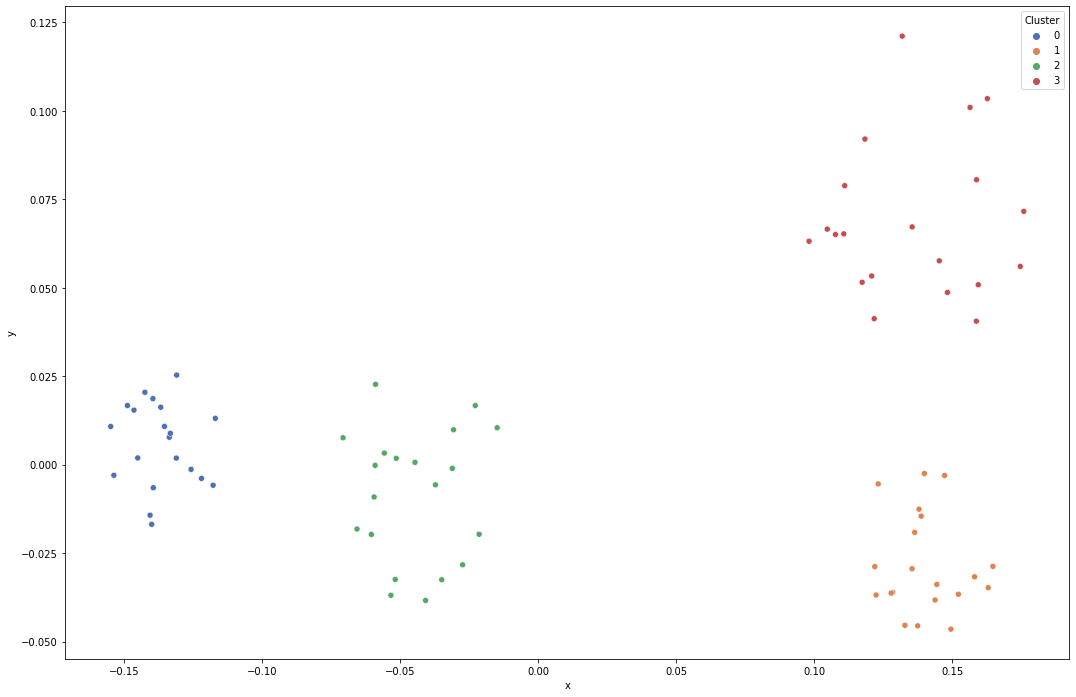

In [ ]:
f,axes = plt.subplots(figsize=(18,12))
sns.scatterplot(data=labels_coordinates_2, x="x", y="y",hue="Cluster",palette="deep")
plt.show()

## **Se agregan otras historias clínicas para notar su cercanía a los cluster de reportes de eventos adversos**

**Prueba con nuevas historias**

Se convierten según el modelo de fasttext

In [ ]:
vectores_historias=[]

In [ ]:
for i in historias_prueba:
  vectores_historias.append(model.get_sentence_vector(i.replace("\n", " ")))

Ahora convertir los vectores en coordenadas del PCA

In [ ]:
prueba_pca=pca.transform(vectores_historias)

In [ ]:
prueba_coordinates=pd.DataFrame(prueba_pca).rename(columns={0:'x',1:'y'})

In [ ]:
prueba_coordinates=pd.concat([prueba_coordinates,pd.DataFrame(historias_prueba).rename(columns={0:'historia'})],axis=1)

Asignar cada historia a uno de los clusters

In [ ]:
prueba_coordinates=pd.concat([prueba_coordinates,pd.DataFrame(kmeans.predict(pd.DataFrame(prueba_pca))).rename(columns={0:'Cluster'})],axis=1)

In [ ]:
aux_1=labels_coordinates_2.loc[:,["x","y","Cluster"]].drop_duplicates()
aux_1["Grupo"]="Evento adverso"

In [ ]:
aux_2=prueba_coordinates.drop("historia",axis=1).drop_duplicates()
aux_2["Grupo"]="Prueba"

In [ ]:
aux=pd.concat([aux_1,aux_2],axis=0)

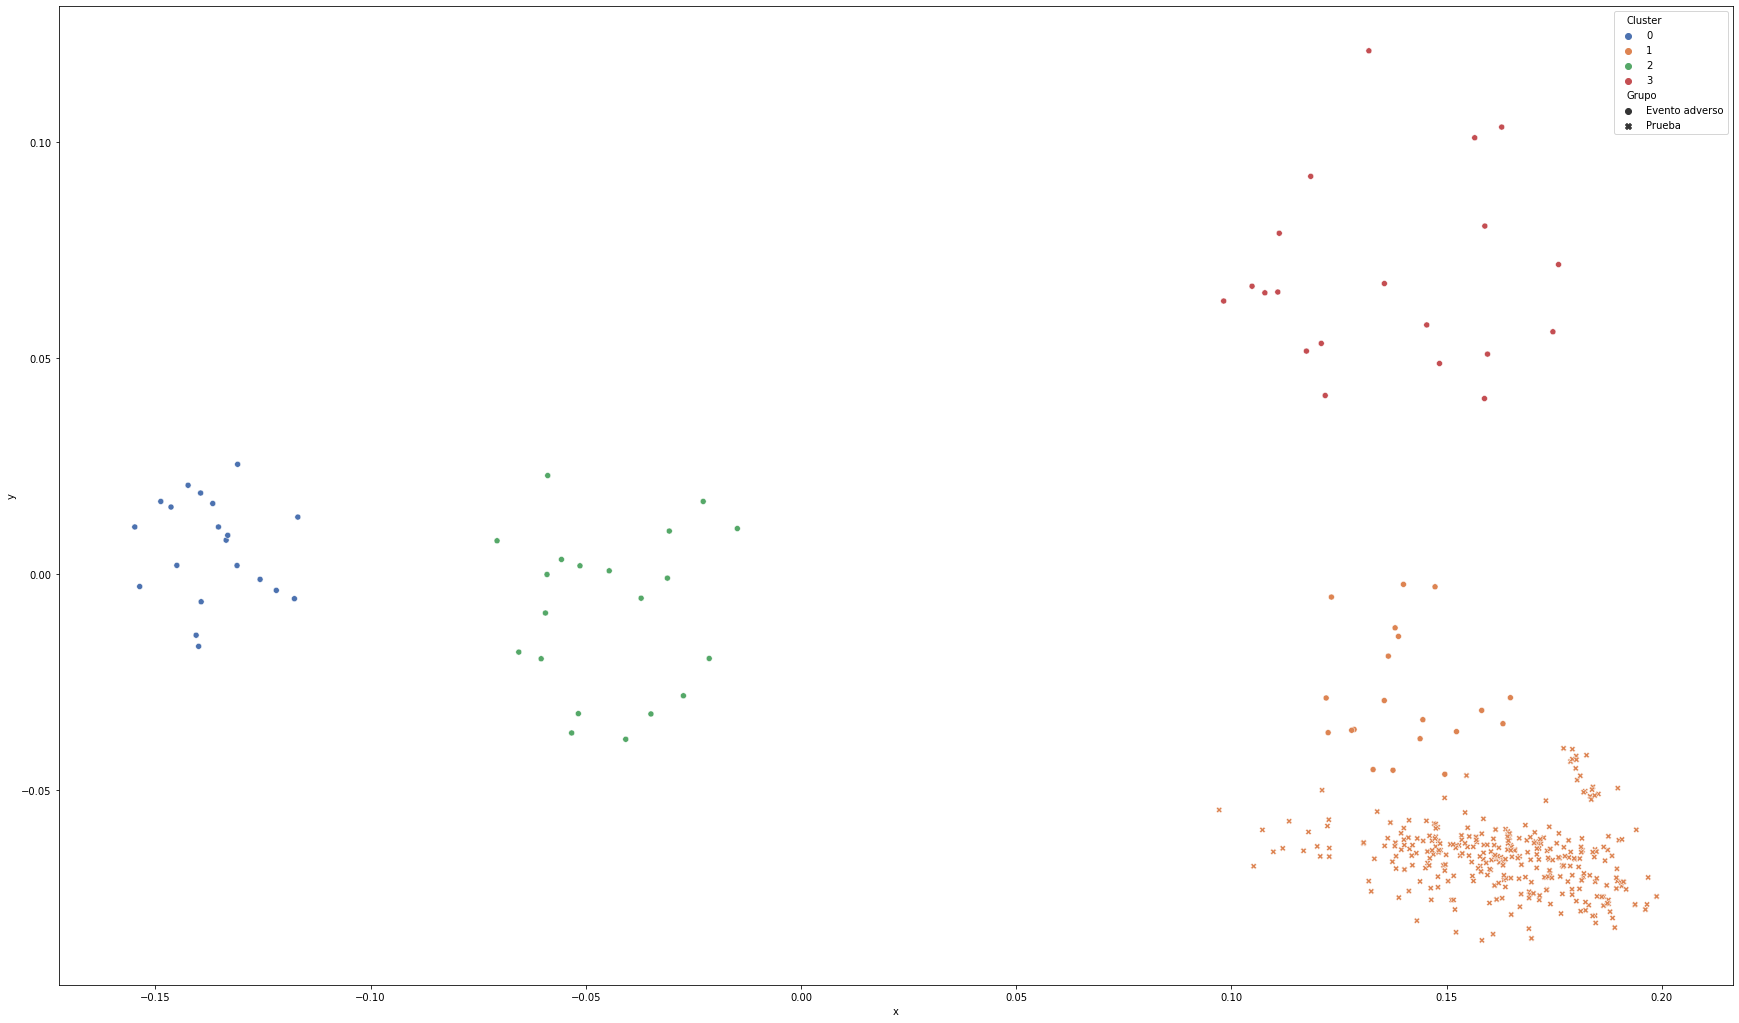

In [ ]:
f,axes = plt.subplots(figsize=(30,18))
sns.scatterplot(data=aux, x="x", y="y",hue="Cluster",style="Grupo",palette="deep")
plt.show()